[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.67, 2.33]
[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.09]


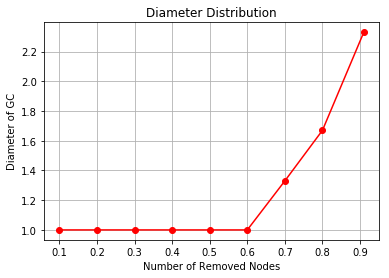

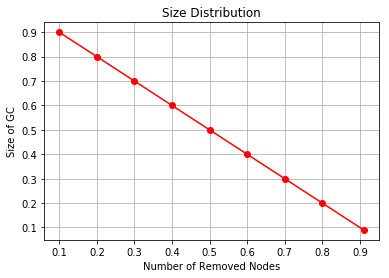

In [25]:
#Network Robustness attack 
import networkx as nx
import random
import pylab as plt

# G = nx.read_gml('C:\\Users\\hp\\power.gml','id')
G = nx.fast_gnp_random_graph(500,0.08)

updated_diameter = []
updated_size = []
removed_nodes = 0
removed_nodelist=[]

def robustness_plot(updated_values, Label):

    plt.figure() 
    plt.grid(True)
    plt.plot(removed_nodelist,updated_values, 'ro-') 
    plt.ylabel( Label + ' of GC')
    plt.xlabel('Number of Removed Nodes')
    plt.title( Label + ' Distribution')
    plt.savefig('./robustness_distribution.pdf')
    plt.show()
    plt.close() 
    
    

def robustness_attack(orignal_graph,type_of_attack):
        
        updated_graph = orignal_graph.copy()
        NumberofNodes=nx.number_of_nodes(orignal_graph)

        original_diameter=nx.diameter(updated_graph)
    
        
        if type_of_attack == "random_attack":
            
            for i in range (50):
                listofNodes = updated_graph.nodes()
                IteratorNodes = 50 
                

                try:
                    RandomNodeSample= random.sample(listofNodes,IteratorNodes) # Random 10% of Nodes randomly
                    updated_graph.remove_nodes_from(RandomNodeSample) 
                except:
                    return
                           
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)
                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
               
                
        if type_of_attack != "random_attack":
                      
            for i in range (50):
                
                if type_of_attack == "betweenness_attack":
                     idegree = nx.betweenness_centrality(updated_graph)
                elif type_of_attack == "degree_attack":
                    idegree = nx.degree_centrality(updated_graph)
                elif type_of_attack == "closeness_attack":
                    idegree = nx.closeness_centrality(updated_graph)
                elif type_of_attack == "clustering_attack":
                    idegree = nx.clustering(updated_graph)
                elif type_of_attack == "pagerank_attack":
                    idegree = nx.pagerank(updated_graph)    
                               
                Nodes = sorted(idegree.items(), key=lambda x: x[1], reverse=True )[:10]
                remove_nodes = [i[0] for i in Nodes]
               
                updated_graph.remove_nodes_from(remove_nodes)              
                
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)

                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
                

robustness_attack(G,"random_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")
   
        

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.67, 1.67, 1.67, 1.67, 2.0, 2.33, 2.67, 4.33, 5.33, 5.33, 3.0, 0.0]
[0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.82, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.26, 0.24, 0.21, 0.18, 0.1, 0.03, 0.0]


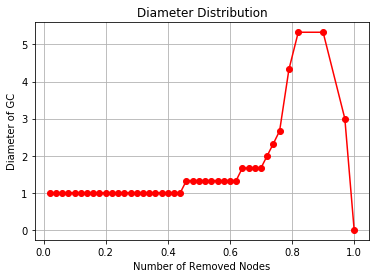

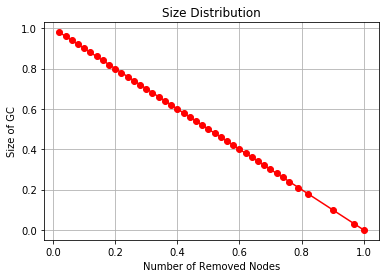

In [30]:
#Betweenness attack
robustness_attack(G,"degree_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.67, 1.67, 1.67, 2.33, 2.33, 3.0, 3.0, 3.33, 4.67, 6.33, 4.0, 6.0, 3.0, 1.0]
[0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.82, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.25, 0.23, 0.21, 0.17, 0.13, 0.1, 0.04, 0.01]


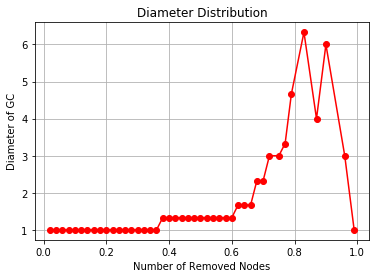

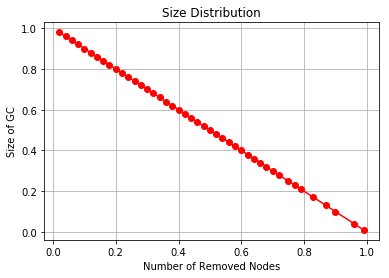

In [31]:
robustness_attack(G,"betweenness_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.67, 1.67, 1.67, 1.67, 2.0, 2.33, 2.67, 3.33, 4.0, 5.33, 4.67, 1.33]
[0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.82, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.26, 0.24, 0.22, 0.2, 0.18, 0.15, 0.05, 0.01]


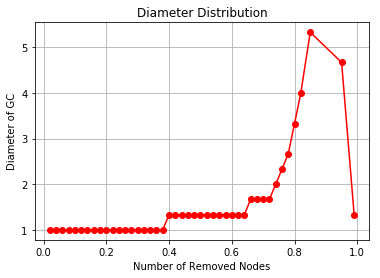

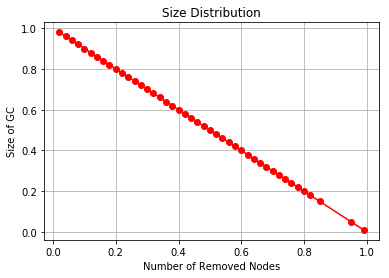

In [32]:
#Closeness attack
robustness_attack(G,"closeness_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.33, 1.0, 1.33, 1.33, 1.33, 1.67, 1.67, 1.67, 1.67, 2.0, 2.0, 2.33, 1.67]
[0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.82, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.26, 0.24, 0.22, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08, 0.05, 0.02]


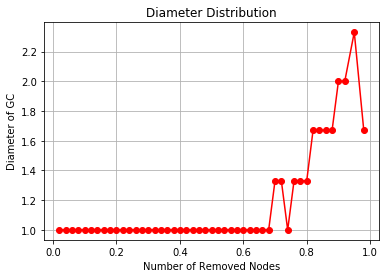

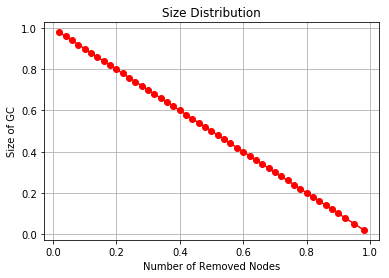

In [35]:
#Clustering attack 
robustness_attack(G,"clustering_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.67, 1.67, 1.67, 2.0, 2.0, 2.33, 3.0, 3.33, 4.0, 6.33, 2.33]
[0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.86, 0.84, 0.82, 0.8, 0.78, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.26, 0.24, 0.21, 0.19, 0.12, 0.02]


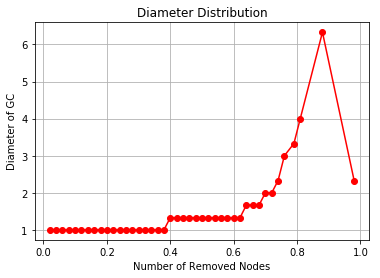

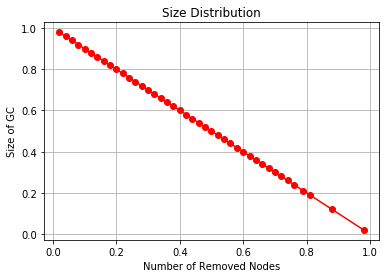

In [36]:
#Pagerank attack
robustness_attack(G,"pagerank_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.02, 1.13, 1.2, 1.11, 1.11, 1.13, 1.13]
[1.0, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.93, 0.92, 0.92, 0.91, 0.91, 0.9, 0.9, 0.9, 0.89, 0.89, 0.89, 0.88, 0.88, 0.87, 0.87, 0.86, 0.86]


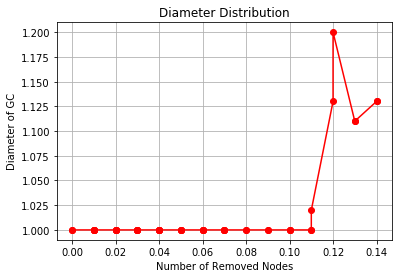

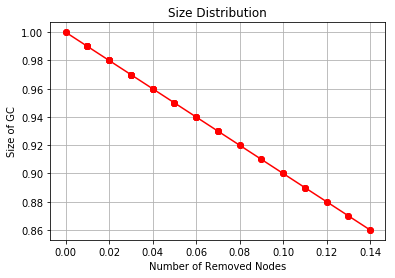

In [37]:
#Network Robustness attack 
import networkx as nx
import random
import pylab as plt

G = nx.read_gml('C:\\Users\\hp\\power.gml','id')
# G = nx.fast_gnp_random_graph(500,0.08)

updated_diameter = []
updated_size = []
removed_nodes = 0
removed_nodelist=[]

def robustness_plot(updated_values, Label):

    plt.figure() 
    plt.grid(True)
    plt.plot(removed_nodelist,updated_values, 'ro-') 
    plt.ylabel( Label + ' of GC')
    plt.xlabel('Number of Removed Nodes')
    plt.title( Label + ' Distribution')
    plt.savefig('./robustness_distribution.pdf')
    plt.show()
    plt.close() 
    
    

def robustness_attack(orignal_graph,type_of_attack):
        
        updated_graph = orignal_graph.copy()
        NumberofNodes=nx.number_of_nodes(orignal_graph)

        original_diameter=nx.diameter(updated_graph)
    
        
        if type_of_attack == "random_attack":
            
            for i in range (50):
                listofNodes = updated_graph.nodes()
                IteratorNodes = 50 
                

                try:
                    RandomNodeSample= random.sample(listofNodes,IteratorNodes) # Random 10% of Nodes randomly
                    updated_graph.remove_nodes_from(RandomNodeSample) 
                except:
                    return
                           
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)
                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
               
                
        if type_of_attack != "random_attack":
                      
            for i in range (50):
                
                if type_of_attack == "betweenness_attack":
                     idegree = nx.betweenness_centrality(updated_graph)
                elif type_of_attack == "degree_attack":
                    idegree = nx.degree_centrality(updated_graph)
                elif type_of_attack == "closeness_attack":
                    idegree = nx.closeness_centrality(updated_graph)
                elif type_of_attack == "clustering_attack":
                    idegree = nx.clustering(updated_graph)
                elif type_of_attack == "pagerank_attack":
                    idegree = nx.pagerank(updated_graph)    
                               
                Nodes = sorted(idegree.items(), key=lambda x: x[1], reverse=True )[:10]
                remove_nodes = [i[0] for i in Nodes]
               
                updated_graph.remove_nodes_from(remove_nodes)              
                
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)

                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
                

robustness_attack(G,"clustering_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")
   

[1.0, 1.07, 1.07, 1.07, 1.09, 1.26, 1.26, 1.26, 1.33, 1.26, 1.26, 1.26, 1.26, 1.3, 1.35, 1.37, 1.37, 1.74, 1.74, 1.74, 1.76, 2.0, 1.78, 2.0, 2.0, 2.3, 2.83, 2.74, 1.7, 1.5, 0.98, 0.89, 0.5, 0.33, 0.09]
[0.98, 0.97, 0.96, 0.94, 0.92, 0.91, 0.88, 0.86, 0.84, 0.81, 0.79, 0.78, 0.77, 0.74, 0.7, 0.66, 0.63, 0.61, 0.6, 0.58, 0.57, 0.55, 0.47, 0.42, 0.4, 0.36, 0.35, 0.25, 0.12, 0.1, 0.04, 0.03, 0.01, 0.01, 0.0]


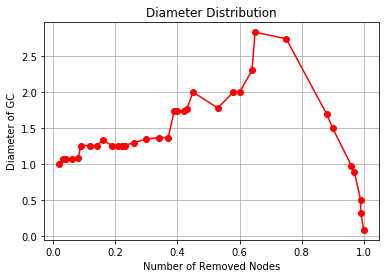

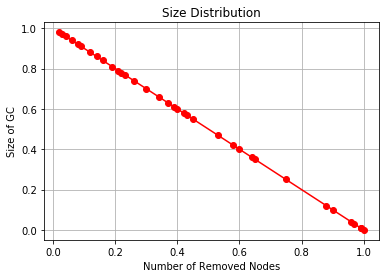

In [38]:
#Network Robustness attack 
import networkx as nx
import random
import pylab as plt

G = nx.read_gml('C:\\Users\\hp\\power.gml','id')
# G = nx.fast_gnp_random_graph(500,0.08)

updated_diameter = []
updated_size = []
removed_nodes = 0
removed_nodelist=[]

def robustness_plot(updated_values, Label):

    plt.figure() 
    plt.grid(True)
    plt.plot(removed_nodelist,updated_values, 'ro-') 
    plt.ylabel( Label + ' of GC')
    plt.xlabel('Number of Removed Nodes')
    plt.title( Label + ' Distribution')
    plt.savefig('./robustness_distribution.pdf')
    plt.show()
    plt.close() 
    
    

def robustness_attack(orignal_graph,type_of_attack):
        
        updated_graph = orignal_graph.copy()
        NumberofNodes=nx.number_of_nodes(orignal_graph)

        original_diameter=nx.diameter(updated_graph)
    
        
        if type_of_attack == "random_attack":
            
            for i in range (50):
                listofNodes = updated_graph.nodes()
                IteratorNodes = 50 
                

                try:
                    RandomNodeSample= random.sample(listofNodes,IteratorNodes) # Random 10% of Nodes randomly
                    updated_graph.remove_nodes_from(RandomNodeSample) 
                except:
                    return
                           
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)
                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
               
                
        if type_of_attack != "random_attack":
                      
            for i in range (50):
                
                if type_of_attack == "betweenness_attack":
                     idegree = nx.betweenness_centrality(updated_graph)
                elif type_of_attack == "degree_attack":
                    idegree = nx.degree_centrality(updated_graph)
                elif type_of_attack == "closeness_attack":
                    idegree = nx.closeness_centrality(updated_graph)
                elif type_of_attack == "clustering_attack":
                    idegree = nx.clustering(updated_graph)
                elif type_of_attack == "pagerank_attack":
                    idegree = nx.pagerank(updated_graph)    
                               
                Nodes = sorted(idegree.items(), key=lambda x: x[1], reverse=True )[:10]
                remove_nodes = [i[0] for i in Nodes]
               
                updated_graph.remove_nodes_from(remove_nodes)              
                
                try:
                    new_graph = max(nx.connected_component_subgraphs(updated_graph), key=len)

                except:
                    return
                
                updated_graph=new_graph.copy() 
                    
                new_diameter =nx.diameter(updated_graph)
                new_size = nx.number_of_nodes(updated_graph)
                
                updated_diameter.append(round((new_diameter/original_diameter),2)) #updated diameter
                updated_size.append(round((new_size/NumberofNodes),2)) #update size
                            
                removed_nodes = NumberofNodes - new_size
                removed_nodelist.append(round((removed_nodes/NumberofNodes),2))
                

robustness_attack(G,"pagerank_attack")
print(updated_diameter)
print(updated_size)
robustness_plot(updated_diameter,"Diameter")
robustness_plot(updated_size,"Size")